# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15660388711                   -0.60    5.9    207ms
  2   -11.16020673016       -2.44       -1.30    1.3    115ms
  3   -11.16040009351       -3.71       -2.33    2.1    169ms
  4   -11.16041610082       -4.80       -3.16    2.3    424ms
  5   -11.16041702856       -6.03       -3.45    2.7    138ms
  6   -11.16041704291       -7.84       -3.61    1.3    111ms
  7   -11.16041704943       -8.19       -3.98    1.1    106ms
  8   -11.16041705105       -8.79       -4.51    1.6    114ms
  9   -11.16041705141       -9.44       -5.03    2.0    127ms
 10   -11.16041705144      -10.53       -5.39    1.6    120ms
 11   -11.16041705145      -11.29       -5.85    1.9    126ms
 12   -11.16041705145      -12.01       -6.29    2.0    134ms


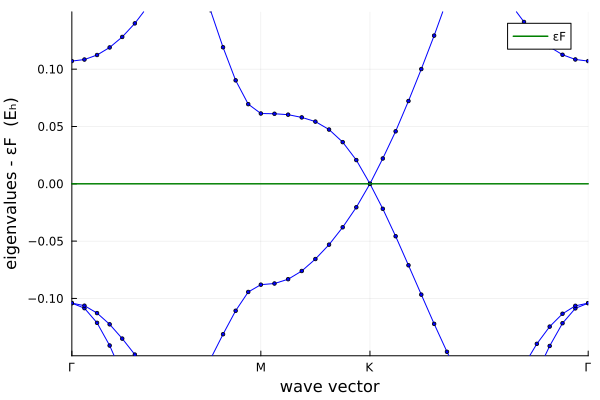

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_DFT(lattice, atoms, positions; functionals=PBE(), temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)